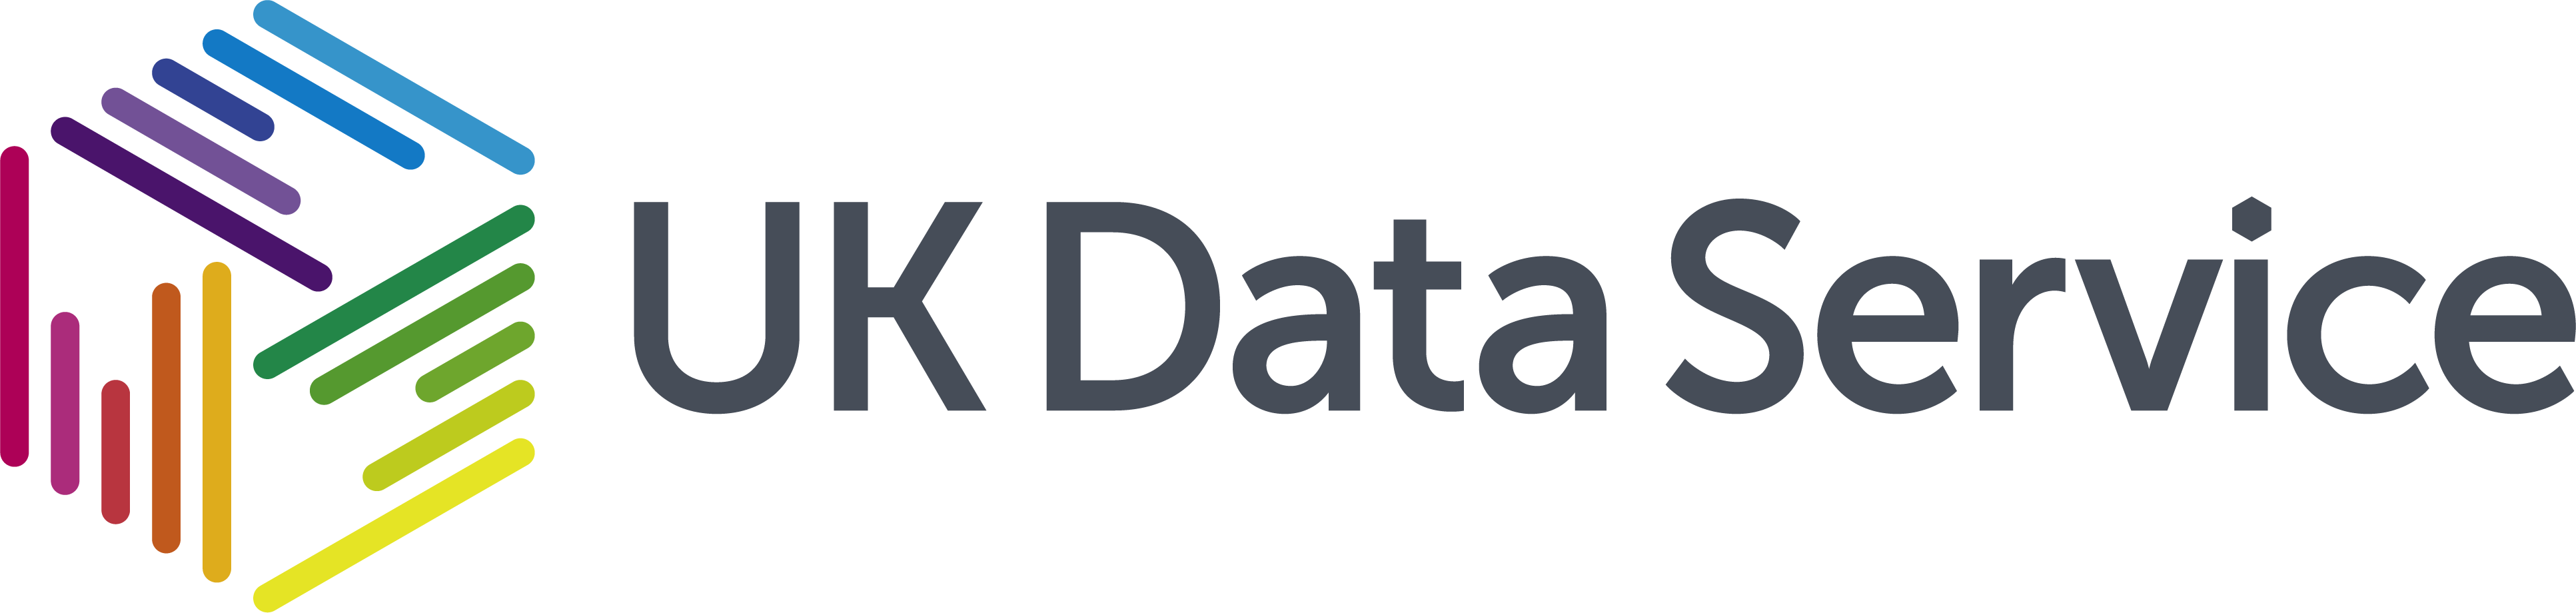

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-and-packages" data-toc-modified-id="Install-and-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install and packages</a></span></li><li><span><a href="#Load-in-the-dataset" data-toc-modified-id="Load-in-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load in the dataset</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Standardise-feature-data" data-toc-modified-id="Standardise-feature-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Standardise feature data</a></span></li><li><span><a href="#Let's-give-clustering-a-go!" data-toc-modified-id="Let's-give-clustering-a-go!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's give clustering a go!</a></span></li><li><span><a href="#Visualisation-for-K-=-5" data-toc-modified-id="Visualisation-for-K-=-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualisation for K = 5</a></span></li><li><span><a href="#Elbow-Method---let's-find-the-optimal-number-of-clusters" data-toc-modified-id="Elbow-Method---let's-find-the-optimal-number-of-clusters-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Elbow Method - let's find the optimal number of clusters</a></span></li><li><span><a href="#Silhouette-coefficient---let's-calculate-the-'goodness'-of-our-clusters!" data-toc-modified-id="Silhouette-coefficient---let's-calculate-the-'goodness'-of-our-clusters!-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Silhouette coefficient - let's calculate the 'goodness' of our clusters!</a></span></li><li><span><a href="#Visualisation-for-K-=-3" data-toc-modified-id="Visualisation-for-K-=-3-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visualisation for K = 3</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Single-linkage-clustering" data-toc-modified-id="Single-linkage-clustering-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Single-linkage clustering</a></span></li><li><span><a href="#Complete-linkage-clustering" data-toc-modified-id="Complete-linkage-clustering-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Complete linkage clustering</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li></ul></div>

## Install and packages

In [1]:
# Import necessary packages...


import pandas as pd
# includes useful functions for manipulating data 

import numpy as np
# includes useful functions for performing mathematical operations

import matplotlib.pyplot as plt
import seaborn as sns
# used for creating visualisations and graphs

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# sklearn stands for scikit-learn - a machine learning library: used to build machine learning models

from kneed import KneeLocator
# kneed is a package that includes functions to help identify the knee/elbow point 

from scipy.cluster.hierarchy import dendrogram, linkage
# scipy contains a collection of mathematical algorithms and convenience functions 

from yellowbrick.cluster import SilhouetteVisualizer
# Yellowbrick provides the yellowbrick.cluster module to visualize and evaluate clustering behavior

from mpl_toolkits.mplot3d import Axes3D
# mpl_toolkits contains functions to help us plot 3D graphs

## Load in the dataset

The Iris Dataset contains  50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [2]:
# Load up the Iris dataset

iris = pd.read_csv("Data/iris.csv")
# here we create a variable 'iris' by reading in our csv file as a dataframe
# important parameter is the filepath of our dataset

### What's a parameter? And how does it differ to a function argument?

First, let's define functions. A function is a block of code that performs a task. It can be called and reused multiple times. You can pass information to a function and it can send information back. In the above cell, 'pd.read_csv()' is our function.

Basically, parameters in python are variables — placeholders for the actual values the function needs. When the function is called, these values are passed in as arguments.

So, in this case, if we refer to the documentation for our pd.read_csv(), 'filepath' is our parameter, and "Data/iris.csv" is the argument because it's the value I passed in! 

# K-Means clustering

Clustering algorithms such as K-Means are unsupervised, so they are trained on features/attributes only.
The goal is to summarise and find patterns or an underlying structure by organising data into similarity groups (clusters).

## Exploring the data

As previously mentioned, clustering algorithms do not require labelled data. But, you'll notice we have a column 'variety' with our target attribute. This can be ignored, as we won't be feeding this target attribute to the algorithm. 

In [3]:
iris.head()
# allows us to view the first 5 rows of a dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.info()
# gives us a concise summary of the dataframe 
# number of columns, missing data count, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Let's look at the frequency distribution of species
iris.variety.value_counts()
# reveals we have 50 samples for each species

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [6]:
iris.describe()
# tells us about the statistical variation in our data

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print('\n Feature Variance')
print(iris.var())


 Feature Variance
sepal.length    0.685694
sepal.width     0.189979
petal.length    3.116278
petal.width     0.581006
dtype: float64


/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_25340/1217029334.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(iris.var())


## Standardise feature data

### Why bother?

When it comes to performing clustering on a given dataset, you must think carefully about your feature variables. 

Perhaps your dataset contains information on bank loans and customer data. It could contain a variable 'annual income' which ranges from £19,000 - £1,000,000, and another variable 'monthly debt' which ranges from £0 - £400,000. Therefore, we must change the values of these numeric columns in the dataset to ensure that they use a common scale, i.e., we standardise/normalise the data. In machine learning, this is referred to as 'feature scaling', and is especially important for clustering given that it is a distance-based algorithm.

Because k-means uses the Euclidean distance to calculate the distance between data points and the centroids, we need to ensure that the distance measure accords equal weight to each variable. We don't want to put more weight on variables that might have higher variance. 


To do this, we will use scikit-learn's preprocessing package which comes with a StandardScaler() class, which is a quick way to perform feature scaling.


First, let's separate our features from the target attribute. 

In [8]:
x = iris.iloc[:, [0,1,2,3]].values
# iloc helps us select specific rows or columns from a dataset
# values returns a NumPy representation of a dataframe - with the axes labels removed
# values are stored in a 2D array

In [9]:
x[:10]
# we use [:10] to slice our array
# this prints the first 10 values in the array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
ss = StandardScaler()
# create a variable 'ss' that contains our feature scaling function

x = ss.fit_transform(x)
# first we fit the standard scaler to the data - computes mean and std
# then we use transform to scale the data 
 
x = pd.DataFrame(x, columns = iris.columns[:-1])
# converts the array 'x' into a dataframe with feature columns - but we exclude the 'variety' column 
# makes the output easier to read than a big array

x.head()
# allows us to view the first 5 rows of data


,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
x.describe()
# tells us about the statistical variation - we can see how it's changed after standardisation 
# check the mean and std of each feature
# we can see mean is very close to 0 and std very close to 1

,sepal.length,sepal.width,petal.length,petal.width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## Let's give clustering a go!

Of course, we already know that the optimum number of clusters for this dataset is going to be 3 (given we have 3 species), but for now, let's pretend that we don't know this and randomly set k = 5.

To cluster our data we can use the KMeans class which comes with the scikit-learn package. It has the following parameters:

* init - this is the method for initialisation. The standard version of the k-means algorithm is implemented by setting init to "random".
* n_clusters - this is the number of clusters that you want the algorithm to form, as well as the number of centroids to generate.
* n_init - this refers to the number of initialisations, i.e., the number of times that the k-means algorithm will be run with differen random initialisation points. This is important because 2 runs can converge on different cluster assignments. The default behaviour for the scikit-learn algorithm is to perform ten k-means runs and then return the results of the one with the lowest sum of the squared error (SSE).
* max_iter - this refers to the max number of iterations of the algorithm for a single run. 
* random_state - Determines random number generation for centroid initialization. We can use an integer to make the randomness deterministic.

### Create instance of KMeans class

You'll notice I've used an integer (32) for the random_state parameter. This ensures that we will all get the same random initialisation points! But, the default for this parameter is none, so feel free to leave it out if you don't want to get the exact same points as me. 

In [12]:
kmeans5 = KMeans(
    init="random",
    n_clusters=5,
    n_init = 10,
    max_iter=300,
    random_state=32
)

### Fit K-Means with our features

The fit function below comprises the training part of the modelling process. We fit our k-means estimator with our scaled_features. The code below will perform 10 runs of the k-means algorithm on the data, with a maximum of 300 iterations per run - as specified when we created the instance of KMeans class.

In [13]:
kmeans5.fit(x)

KMeans(init='random', n_clusters=5, random_state=32)

### Access lowest SSE value from the 10 initialisations

In [14]:
kmeans5.inertia_

# The lowest SSE value is also referred to as the 'inertia'

91.55536235350215

In [15]:
kmeans5.cluster_centers_

# We can also access the final locations of the centroids
# I.e., these are the coordinates of the cluster centers

array([[-0.57445998,  1.95749886, -1.27027277, -1.20406322],
       [-0.42151732, -1.42945216,  0.03937284, -0.05297198],
       [ 0.35704132, -0.39440379,  0.58656225,  0.54846743],
       [ 1.39733017,  0.23316022,  1.16062026,  1.21734049],
       [-1.15648001,  0.52663905, -1.31496545, -1.27522335]])

### What other attributes does KMeans have?

You can also get information on the following:

* labels_ = labels of each data point
* n_iter_ = the number of iterations it took before the algorithm converged
* n_features_in_ = the number of features seen during the fit process
* feature_names_in_ = the names of features seen during fit process

In [16]:
kmeans5.n_iter_

# It took 13 iterations before the algorithm converged

13

In [17]:
kmeans5.labels_

# Shows which cluster label each data point has
# Remember: in computer science we count from 0, so we do indeed have 5 clusters
# These labels are stored as a one-dimensional NumPy array

array([4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       0, 4, 0, 4, 0, 4, 3, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2], dtype=int32)

## Visualisation for K = 5

In [18]:
u_labels = np.unique(kmeans5.labels_)
u_labels

array([0, 1, 2, 3, 4], dtype=int32)

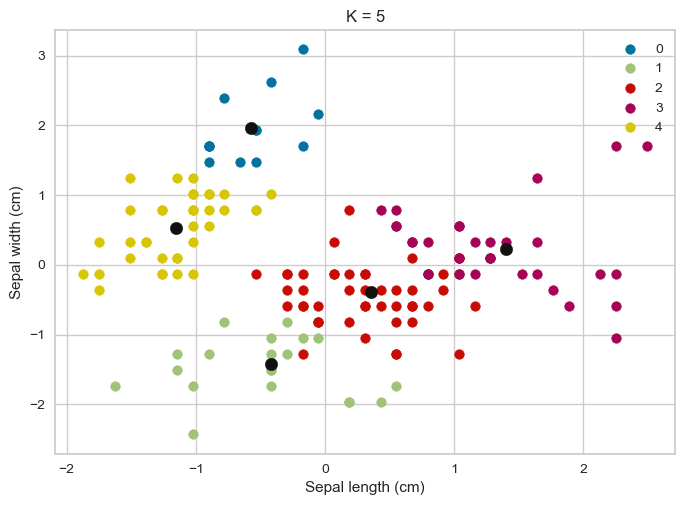

In [19]:
for i in u_labels:
    plt.scatter(x.iloc[kmeans5.labels_ == i , 0] , x.iloc[kmeans5.labels_ == i , 1], label = i)
plt.scatter(kmeans5.cluster_centers_[:,0] , kmeans5.cluster_centers_[:,1] , s = 80, color = 'k')
plt.legend()
plt.title("K = 5")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

### 3D Visualisation

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_25340/777643286.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-145, azim=140)


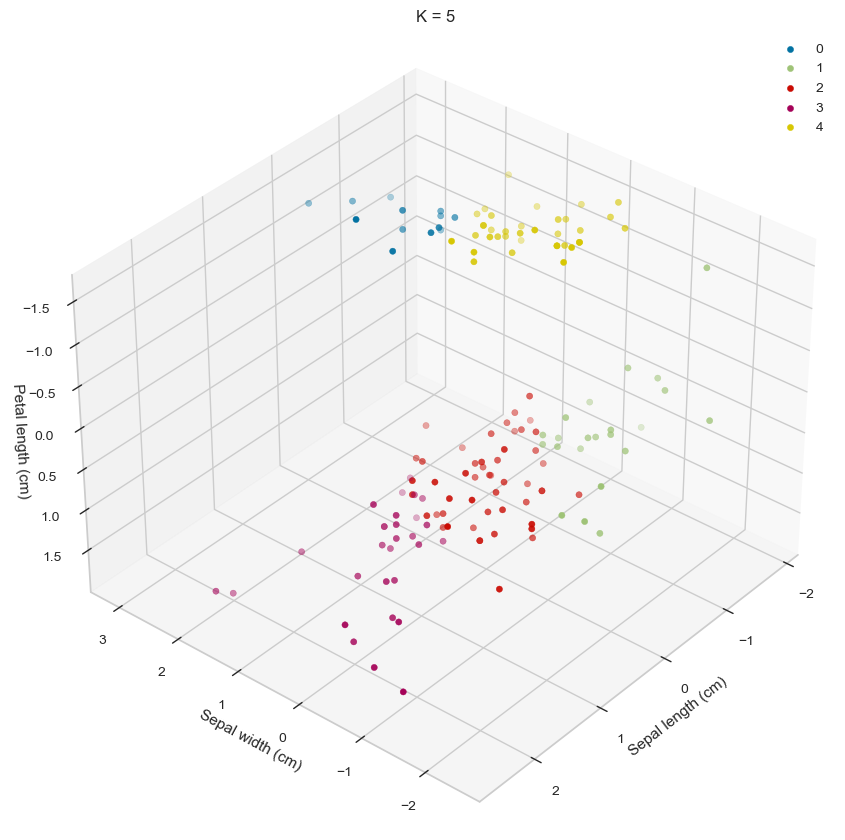

In [20]:

fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-145, azim=140)


for i in u_labels:
    ax.scatter(x.iloc[kmeans5.labels_ == i, 0], x.iloc[kmeans5.labels_ == i, 1], x.iloc[kmeans5.labels_ == i, 2],
    label = i)

    
ax.set_title("K = 5")
ax.set_xlabel("Sepal length (cm)")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("Sepal width (cm)")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("Petal length (cm)")
# ax.w_zaxis.set_ticklabels([])

plt.legend()
plt.show()

## Elbow Method - let's find the optimal number of clusters

### A brief recap!

Determining the number of clusters is a crucial step in the k-means algorithm. You'll notice that each time you increment the number of clusters, the inertia value (the lowest SSE value found during the k-means runs) decreases. That's a good thing right? Not entirely, as at some point this becomes 'over-fitting', which describes a statistical model that fits exactly against its training data. When this happens our model becomes ineffective, as it cannot be used to effectively predict the classes of unseen data. 

As more centroids are added, the distance from each point to its closest centroid will decrease. So, how do we know when to stop adding centroids? How can we avoid 'over-fitting'?

A common method used to evaluate the appropriate number of clusters is the 'elbow method'. This involves running k-means clustering on the dataset for a range of values for k (e.g. 1-10). Then, we compute the SSE values for each k. The elbow method reveals a 'sweet spot' where the SSE curve starts to bend, i.e, its elbow point. This is the point at which diminishing returns are no longer worth the additional cost, i.e., choose the number of clusters so that adding another one doesn't produce a significantly better modelling of the data. 

In [21]:
# Create a dictionary of keyword arguments

kmeans5_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 32}



# Here we create a variable 'sse' which contains an empty list

sse = []

# We then iterate through each k value, ranging from 1-10
# Note: range() method does not include the end number in the result, that's why we do 1-11
for k in range(1, 11):
    
#     For each k, we instantiate the kmeans class 
# Here, the double asterix operator **  is used to unpack a dictionary of keyword arguments, kwargs
# We use it to unpack kmeans_kwargs, which have passed to the KMeans function
    kmeans = KMeans(n_clusters=k, **kmeans5_kwargs)
    print(kmeans)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Let's take a look at our SSE scores
print("")
print(sse)

KMeans(init='random', n_clusters=1, random_state=32)
KMeans(init='random', n_clusters=2, random_state=32)
KMeans(init='random', n_clusters=3, random_state=32)
KMeans(init='random', n_clusters=4, random_state=32)
KMeans(init='random', n_clusters=5, random_state=32)
KMeans(init='random', n_clusters=6, random_state=32)
KMeans(init='random', n_clusters=7, random_state=32)
KMeans(init='random', random_state=32)
KMeans(init='random', n_clusters=9, random_state=32)
KMeans(init='random', n_clusters=10, random_state=32)

[600.0, 222.361704965023, 139.82049635974974, 114.41256181896088, 91.55536235350215, 81.7635103729238, 72.16740772304377, 63.87425654098382, 55.718735499442204, 51.157588998178284]


Just from looking at these numbers we can see that after 114.412.. we notice that the inertia starts decreasing in a more linear fashion. This indicates that k=3 will be the optimum number. But plotting this makes this more obvious, as we can observe the bend, so let's go ahead and do that!

### Visualisation for Elbow Method

We want to pick the value of k at the "elbow" i.e., the point after which the inertia starts decreasing in a linear fashion. In order to observe the elbow, we can plot the number of clusters and the corresponding sse values. In the graph below, it's rather subtle, but we can see that the elbow point is at k=3. In which case, we can determine that the appropriate number of clusters for this dataset, is 3.

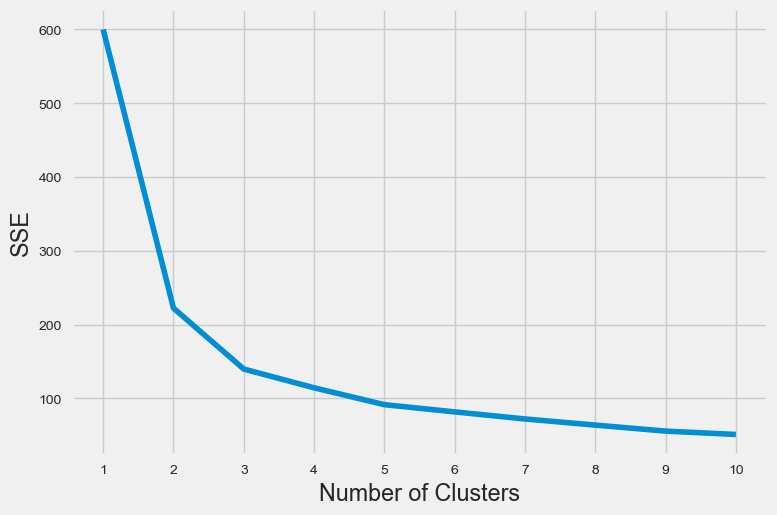

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

However, if the graph isn't all that clear, and you'd like a more straightforward means of acquiring the elbow point, you can use the 'kneed' Python package. This comes with the KneeLocator() class, which determines the elbow point programmatically. Let's see if it matches our observation that k should = 3.

In [23]:

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")


# We can now access the 'elbow' variable
kl.elbow

3

In [24]:
kmeans3 = KMeans(
    init="random",
    n_clusters=3,
    n_init = 10,
    max_iter=300,
    random_state=32
)

In [25]:
kmeans3.fit(x)

KMeans(init='random', n_clusters=3, random_state=32)

## Silhouette coefficient - let's calculate the 'goodness' of our clusters!

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

TLDR: its a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.

### Silhouette score for K=3

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

In [26]:
silhouette_score(x, kmeans3.labels_)

0.45994823920518646

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


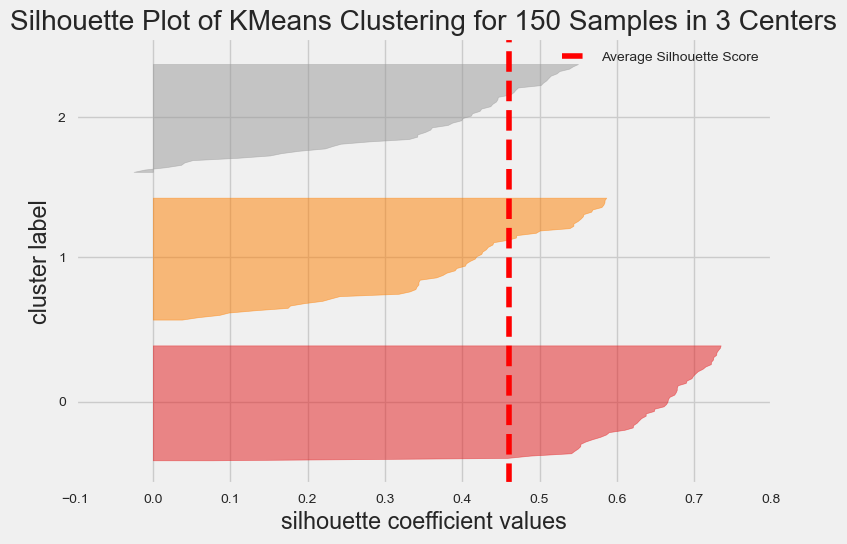

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
visualizer = SilhouetteVisualizer(kmeans3)

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

### Silhouette score for K=3

Now we see that the width of clusters 1 to 6 have become narrow, of unequal width and their silhouette coefficient scores have dropped. This occurs because the width of each silhouette is proportional to the number of samples assigned to the cluster. The model is trying to fit our data into a larger than optimal number of clusters, making some of the clusters narrower but much less cohesive as seen from the drop in average-silhouette score.

In [28]:
silhouette_score(x, kmeans5.labels_)

0.36636550489233866

In [29]:
kmeans5

KMeans(init='random', n_clusters=5, random_state=32)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


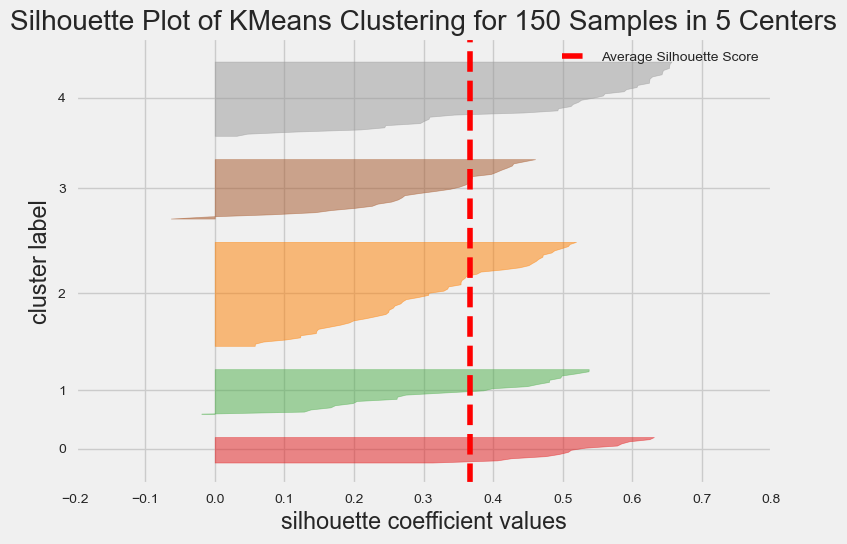

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
visualizer = SilhouetteVisualizer(kmeans5)

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

## Visualisation for K = 3

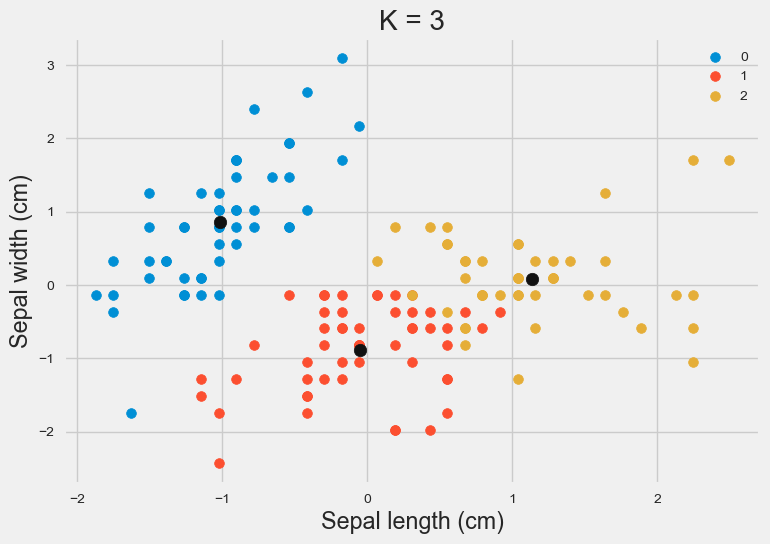

In [31]:
u_labels = np.unique(kmeans3.labels_)
u_labels


for i in u_labels:
    plt.scatter(x.iloc[kmeans3.labels_ == i , 0] , x.iloc[kmeans3.labels_ == i , 1], label = i)
plt.scatter(kmeans3.cluster_centers_[:,0] , kmeans3.cluster_centers_[:,1] , s = 80, color = 'k')
plt.legend()
plt.title("K = 3")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

### 3D Visualisation for K = 3

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_25340/1668716402.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-145, azim=140)


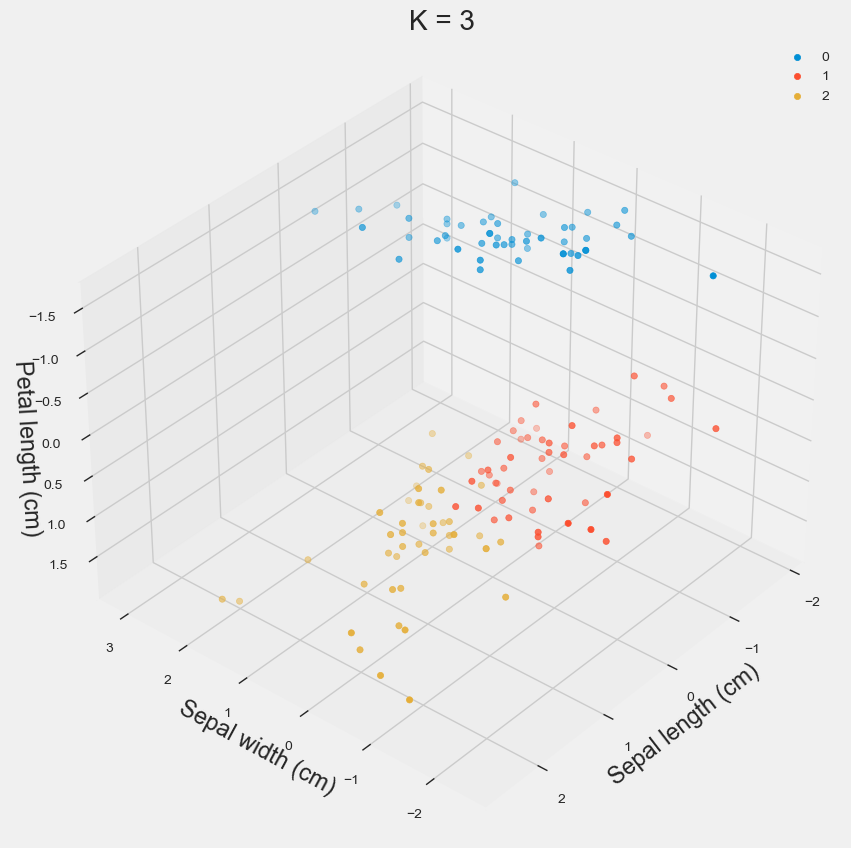

In [32]:


fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-145, azim=140)


for i in u_labels:
    ax.scatter(x.iloc[kmeans3.labels_ == i, 0], x.iloc[kmeans3.labels_ == i, 1], x.iloc[kmeans3.labels_ == i, 2],
    label = i)

    
ax.set_title("K = 3")
ax.set_xlabel("Sepal length (cm)")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("Sepal width (cm)")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("Petal length (cm)")
# ax.w_zaxis.set_ticklabels([])

plt.legend()

# Hierarchical clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

Let's see if the clusters we get from hierarchical clustering, align with the Iris taxonomical classification.

## Exploring the data

### Correlation matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

In [33]:
matcorr = iris.iloc[:,~iris.columns.isin(['variety'])].corr()
# We create a variable 'matcorr' and use iloc to select each Iris attribute
# ~ tilde operator - used to exclude the 'variety' column, as we do not need the species names!
# .corr() is a pandas function which returns a dataframe consisting of correlation values

matcorr

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


But this is boring to look at...so let's create a visualisation which makes these correlations more explicit.

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_25340/106415670.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matcorr, dtype=np.bool)


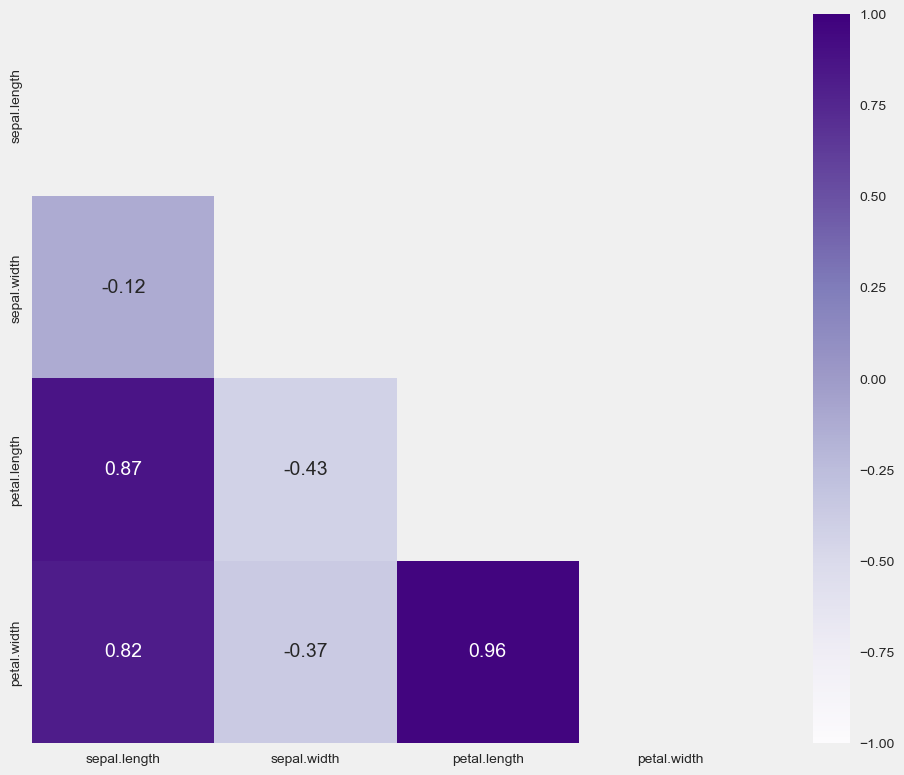

In [34]:
mask = np.zeros_like(matcorr, dtype=np.bool)
# creates a numpy array of boolean values from the matcorr dataframe
# True if variables are correlated, False if not...

mask[np.triu_indices_from(mask)] = True
# accesses the True values from the numpy array

f, ax = plt.subplots(figsize=(12, 9))
# creates a subplot with specified size

sns.heatmap(matcorr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True, annot = True);
# creates a heatmap using the correlation matrix data

plt.show()

From this output we can see that there is a positive correlation between our petal length and petal width attributes, which is a good indicator for clustering. There is also quite a strong correlation between sepal length and petal length, along with sepal width and petal length. Whereas, sepal length is very weakly correlated with the other attributes. 

This tells us the following:

* Longer petals also tend to be wider
* Flowers with longer petals also tend to have longer sepals
* Flowers with longer sepals, tend to have wider petals


### PairGrid 

Pair grids or Pair plots are great for multivariate analysis as they plot pairwise relationships in a dataset. Using the seaborn PairGrid function we can also plot a different function on the diagonal to show the univariate distribution of the variable in each column.

It seems that there are two easily distinguishable groups:

* One with long petals and somewhat longer and thinner sepals
* One with short petals and relatively short and thick sepals


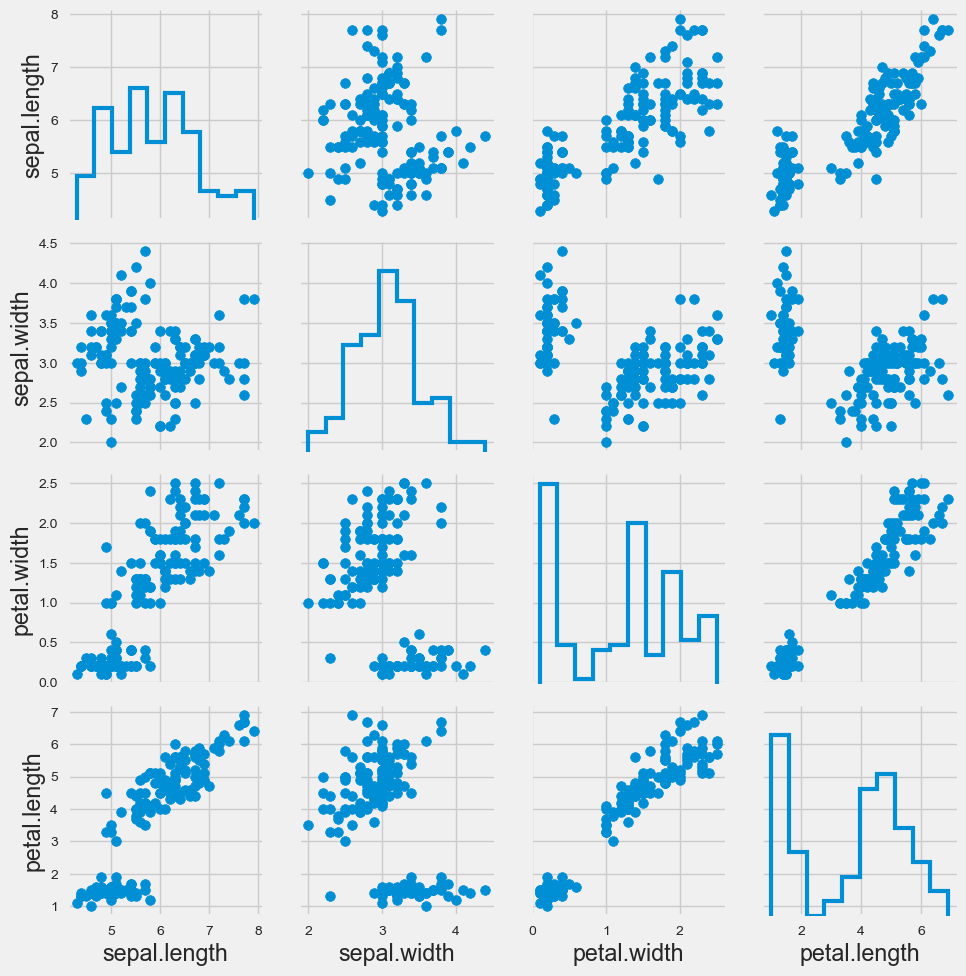

In [35]:
g = sns.PairGrid(iris.loc[:,["sepal.length","sepal.width","petal.width","petal.length"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)


Since we already know that there are individuals from three species in the sample, a priori it seems that there is a species that will by easily separated in one cluster whereas classifying the other two won't be so easy.

## Single-linkage clustering

As expected, the resulting dendrogram using the 'single' suggest the existence of two clusters but it is not so clear the existence of a third one. If I didn't now that the dataser contains data from three species I would stop at two. But we have the advantage of knowing that the labelled dataset outlines 3 species, so we can use some methods to further investigate how much these clusters differ from the taxonomical classification. 

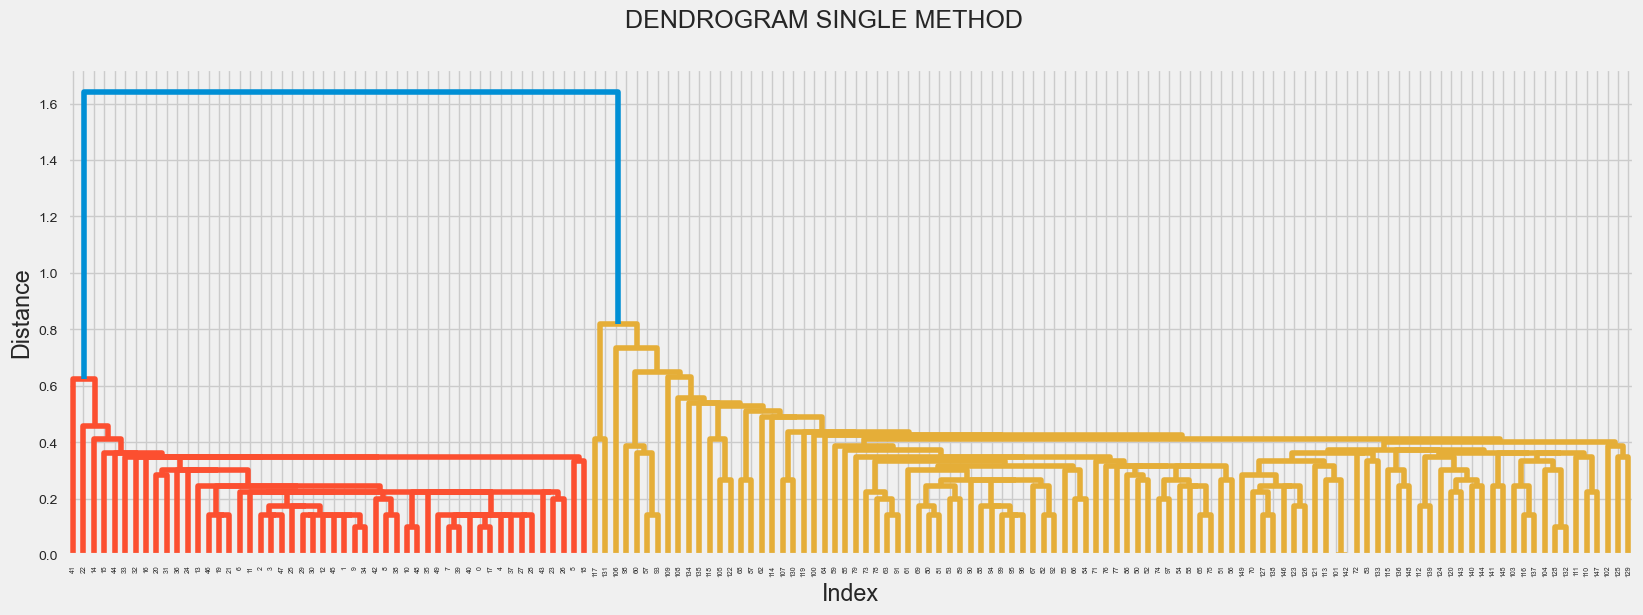

In [36]:
dist_sin = linkage(iris.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

### Let's see if we can make this dendrogram easier to read...

Scipy's dendrogram function has a number of parameters which make a messy dendrogram like the one above, easier to read. 

* truncate_mode - truncation is used to condense the dendrogram, and has 2 available modes.

    1. 'lastp' - shows only the last p merged clusters
    2. 'level'
    
    
* color_threshold - all clusters below a specified value are given different colours

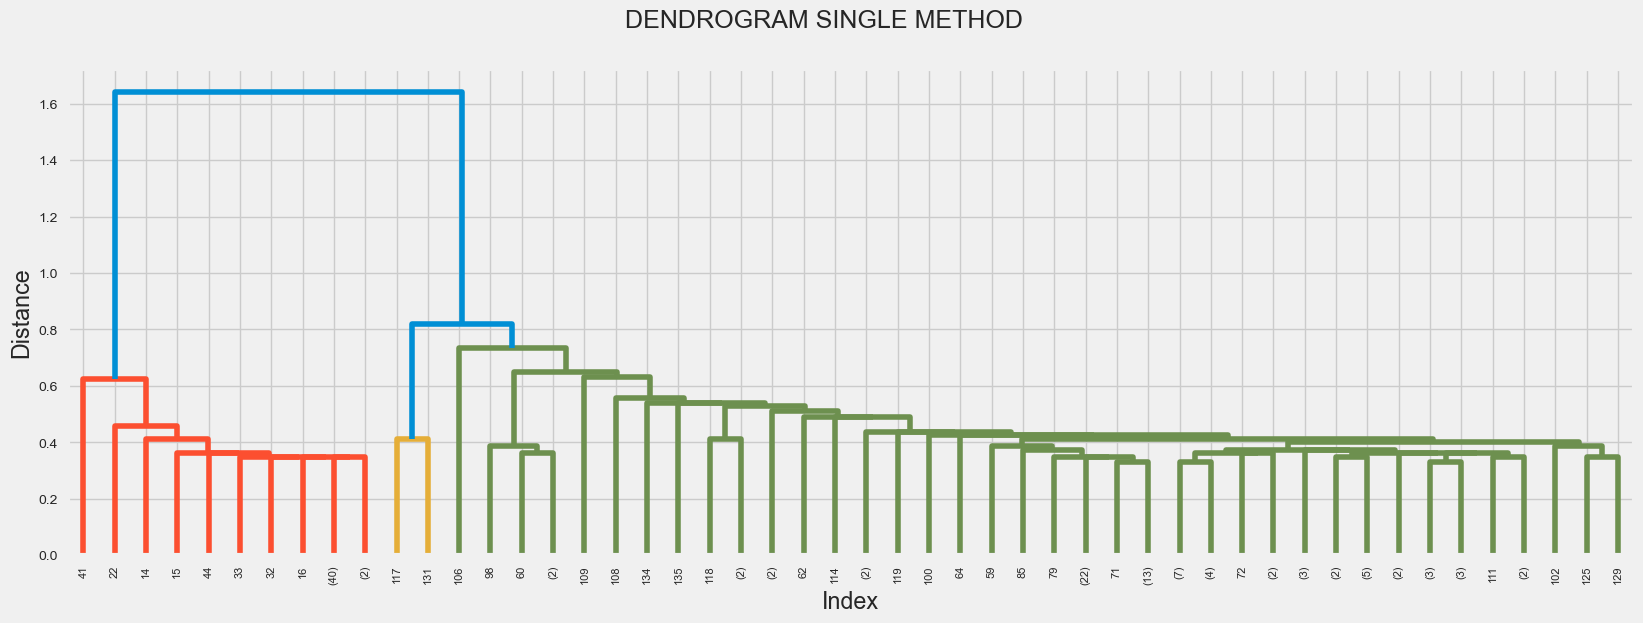

In [37]:
dist_sin = linkage(iris.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode = 'lastp', p = 50, color_threshold = 0.81)
# shows only the last p merged clusters - last 50
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

### Flat clustering with fcluster

To investigate how much these clusters differ from the taxonomical classification, we will use a function called ‘fcluster’ from the scipy.cluster package, which can be used to flatten the dendrogram, and obtain the cluster values for the original data points i.e., it tells us which clusters the dps were assigned to. It has the following important parameters:

* Z - the hierarchical clustering matrix returned by the linkage function: in our case, this is our variable dist_sin
* t - a scalar value which denotes the maximum number of clusters we want
* criterion - the criterion to use in forming the flate clusters. In our case, we’re using ‘maxclust’, which means we want to impose a threshold on the number of flat clusters that the function returns. 


Now we can see how much the clusters differ from the actual species. 

In [38]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)  


from scipy.cluster.hierarchy import fcluster
iris_2 = iris.copy()

iris_2['2_clust']=fcluster(dist_sin,2, criterion='maxclust')
iris_2['3_clust']=fcluster(dist_sin,3, criterion='maxclust')
iris_2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,2_clust,3_clust
0,5.1,3.5,1.4,0.2,Setosa,1,1
1,4.9,3.0,1.4,0.2,Setosa,1,1
2,4.7,3.2,1.3,0.2,Setosa,1,1
3,4.6,3.1,1.5,0.2,Setosa,1,1
4,5.0,3.6,1.4,0.2,Setosa,1,1


### Visualisations using fcluster

We can see from these 3 plots that our single-linkage method has not been able to find the 3 groups in the data. Indeed, if we look at our K=3 plot we can see that there is only a couple of datapoints that have been assigned to cluster 2, whereas the majority reside within 1 and 3. Going from 2 to 3 clusters has made no real difference as the additional cluster is not representative. 

<AxesSubplot:title={'center':'Species'}, xlabel='petal.length', ylabel='petal.width'>

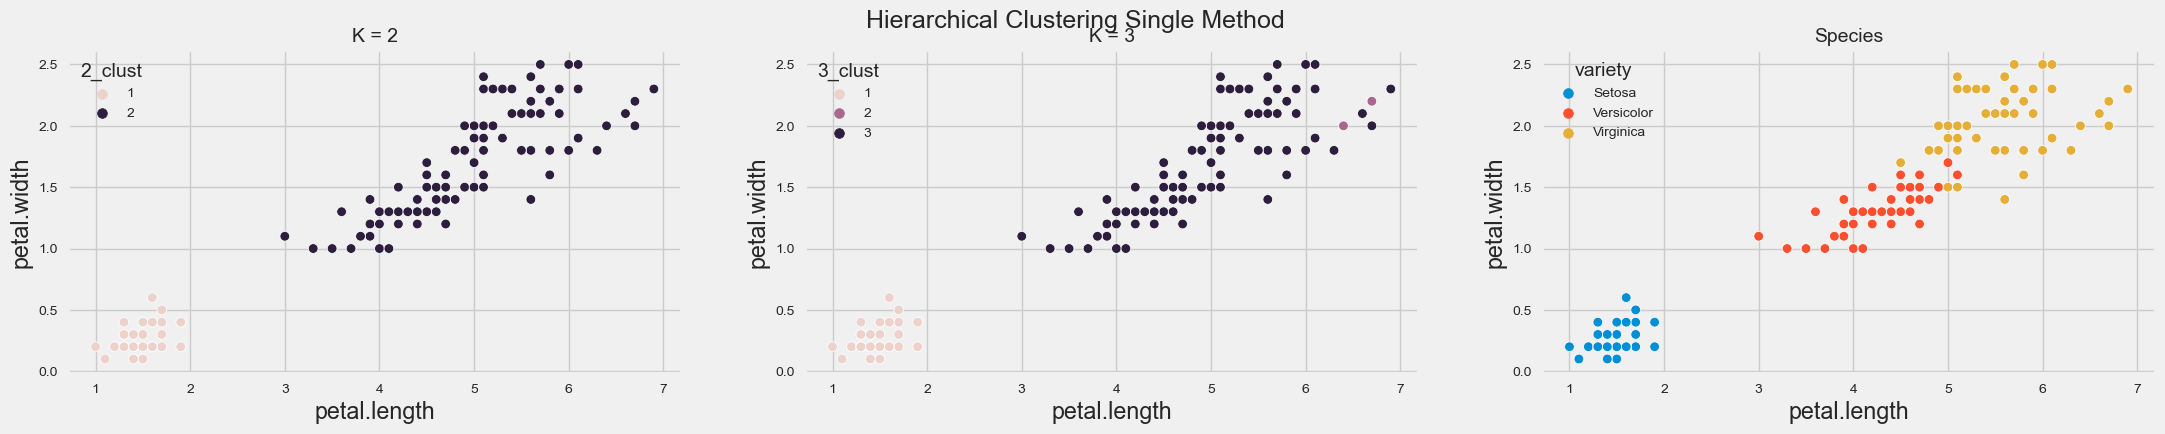

In [39]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="variety")

### Swarm plot

A swarm plot is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. It's basically a scatterplot where one variable is categorical. 

As expected, there is one Species clearly classified by this method, however the other two species are not appropiately separated when using Hierarchical Clustering with the 'Single' method.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='variety', ylabel='3_clust'>

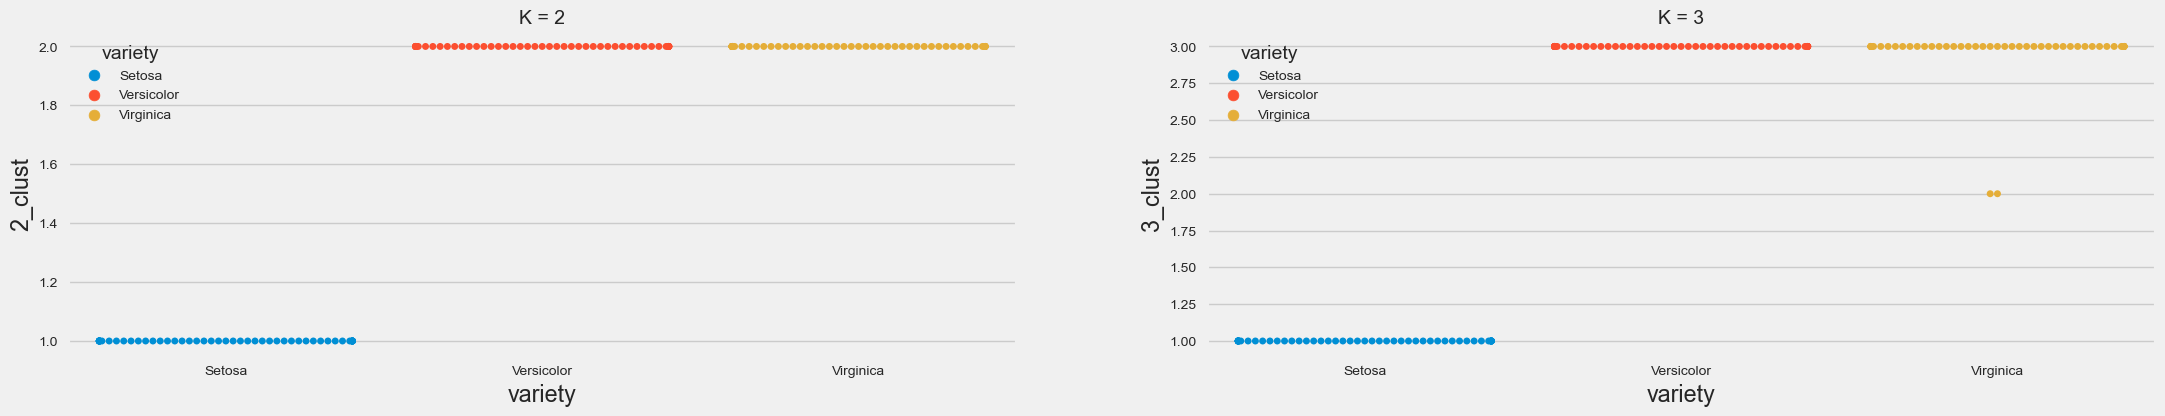

In [40]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="variety",y="2_clust", data=iris_2, hue="variety")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="variety",y="3_clust", data=iris_2, hue="variety")

### Heatmap of feature means

Inference:

* Cluster 1: Small petals and thick Sepals
* Cluster 2: Long Petals and Long Sepals

<AxesSubplot:ylabel='2_clust'>

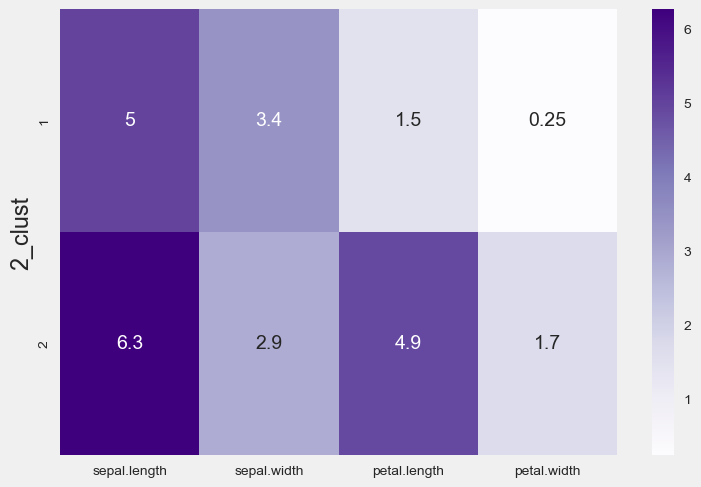

In [41]:
sns.heatmap(iris_2.loc[:,["sepal.length","sepal.width","petal.length","petal.width","2_clust"]].groupby(['2_clust']).mean(), cmap="Purples", annot = True)

In [42]:
iris_2.loc[:,["sepal.length","sepal.width","petal.length","petal.width","2_clust"]].groupby(['2_clust']).mean()

,sepal.length,sepal.width,petal.length,petal.width
2_clust,,,,
1,5.006,3.428,1.462,0.246
2,6.262,2.872,4.906,1.676


## Complete linkage clustering

Using the 'Complete' method for the hierarchical clustering seems to suggests a number of 2 or 3 clusters.

Lets see how well these clusters replicate the taxonomical species of the Iris Flowers.

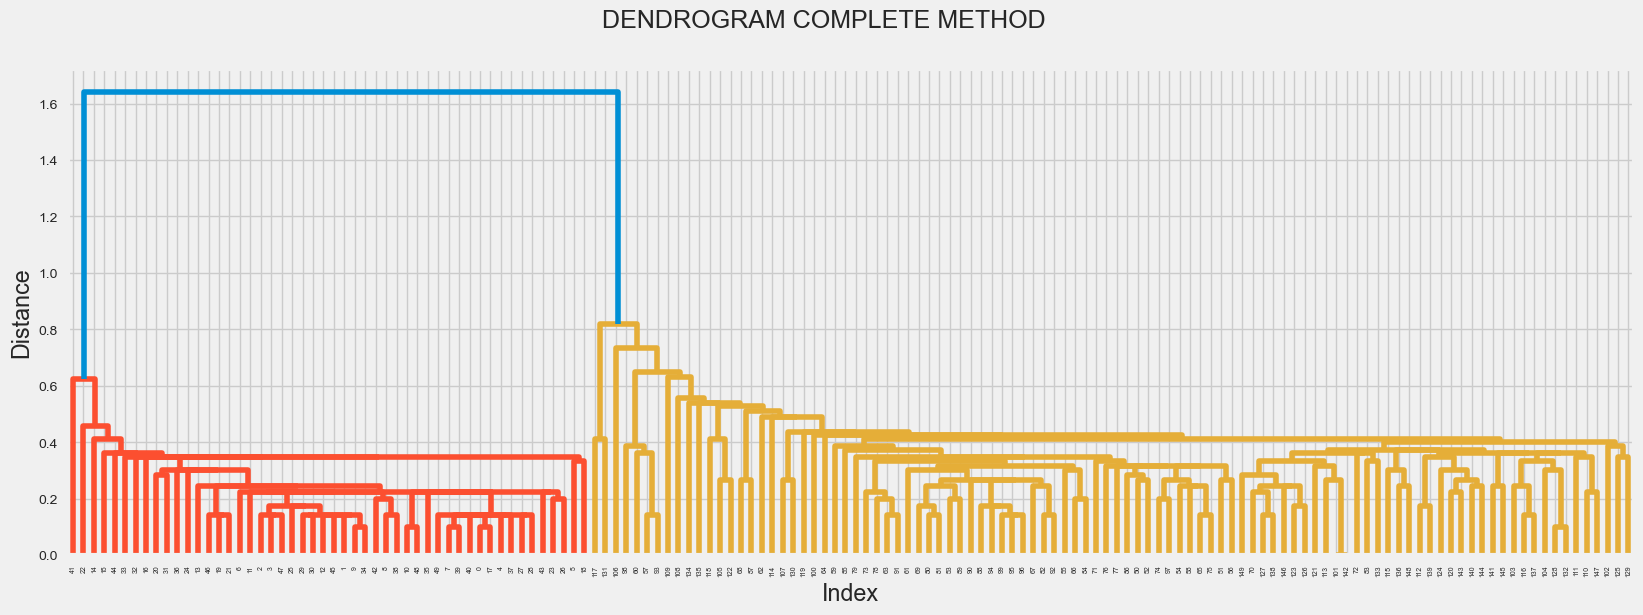

In [43]:
dist_comp = linkage(iris.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

### Let's see if we can make this dendrogram easier to read...

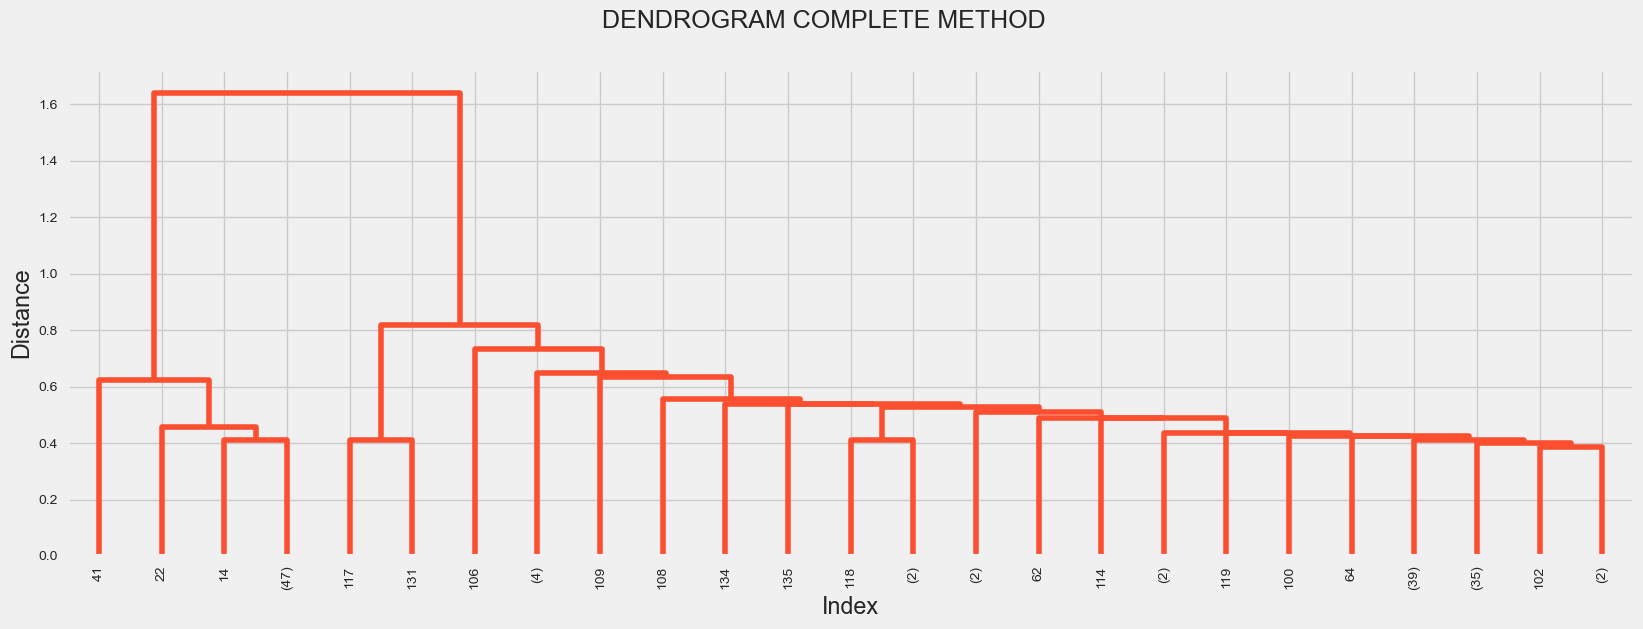

In [44]:
dist_comp = linkage(iris.loc[:,["sepal.length","sepal.width","petal.length","petal.width"]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode = 'lastp', p = 25, color_threshold = 4)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

### Flat clustering with fcluster

In [45]:
iris_2 = iris.copy()

iris_2['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_2['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_2.head()


,sepal.length,sepal.width,petal.length,petal.width,variety,2_clust,3_clust
0,5.1,3.5,1.4,0.2,Setosa,2,3
1,4.9,3.0,1.4,0.2,Setosa,2,3
2,4.7,3.2,1.3,0.2,Setosa,2,3
3,4.6,3.1,1.5,0.2,Setosa,2,3
4,5.0,3.6,1.4,0.2,Setosa,2,3


### Visualisations using fcluster

We can see from these 3 plots that our complete-linkage method has been much more able to find 3 groups in the data. 

<AxesSubplot:title={'center':'Species'}, xlabel='petal.length', ylabel='petal.width'>

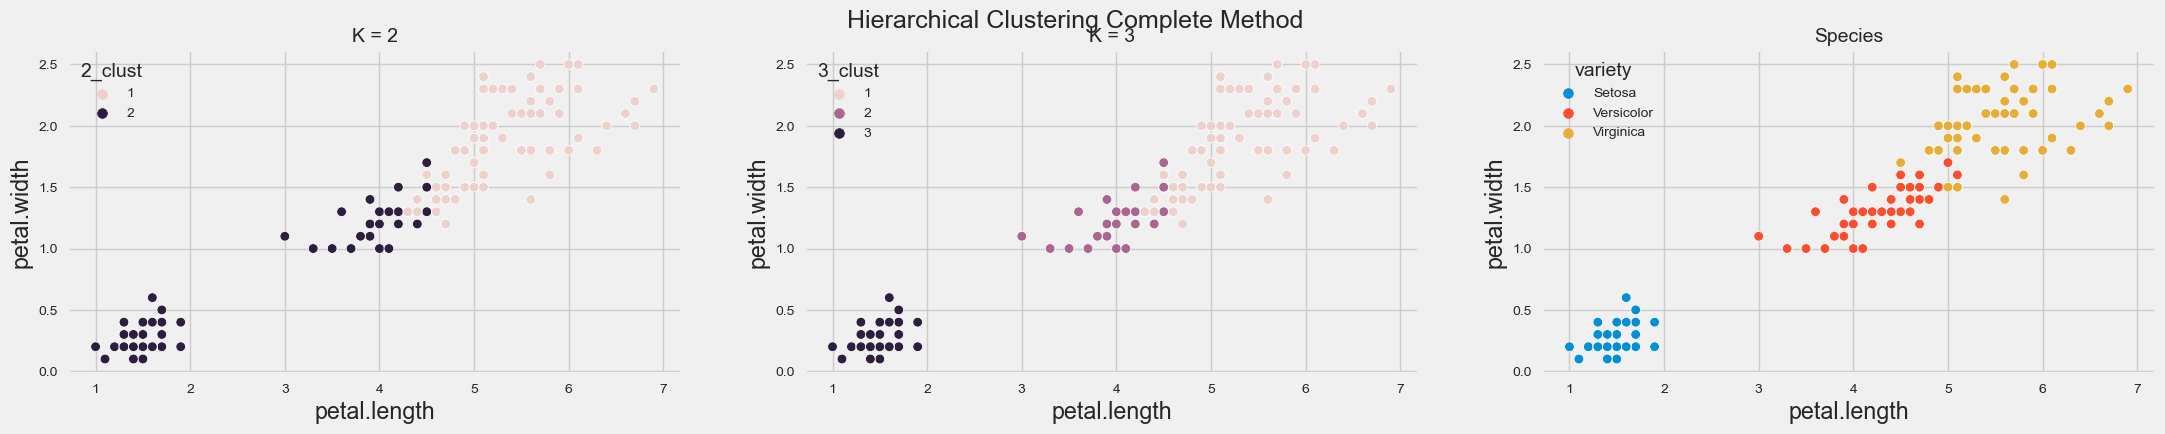

In [46]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="petal.length",y="petal.width", data=iris_2, hue="variety")

### Swarm plot

In this case, two clusters do not seem to work as a good separation between the three species.

Using three clusters separates all iris-setosa specimens in one cluster and all but one specimen of Iris-virginica in another one.

In this case, using "Complete" method for hierarchical clustering gives better results than "Single" method. However, Iris-versicolor data is still problematic for the algorithm.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='variety', ylabel='3_clust'>

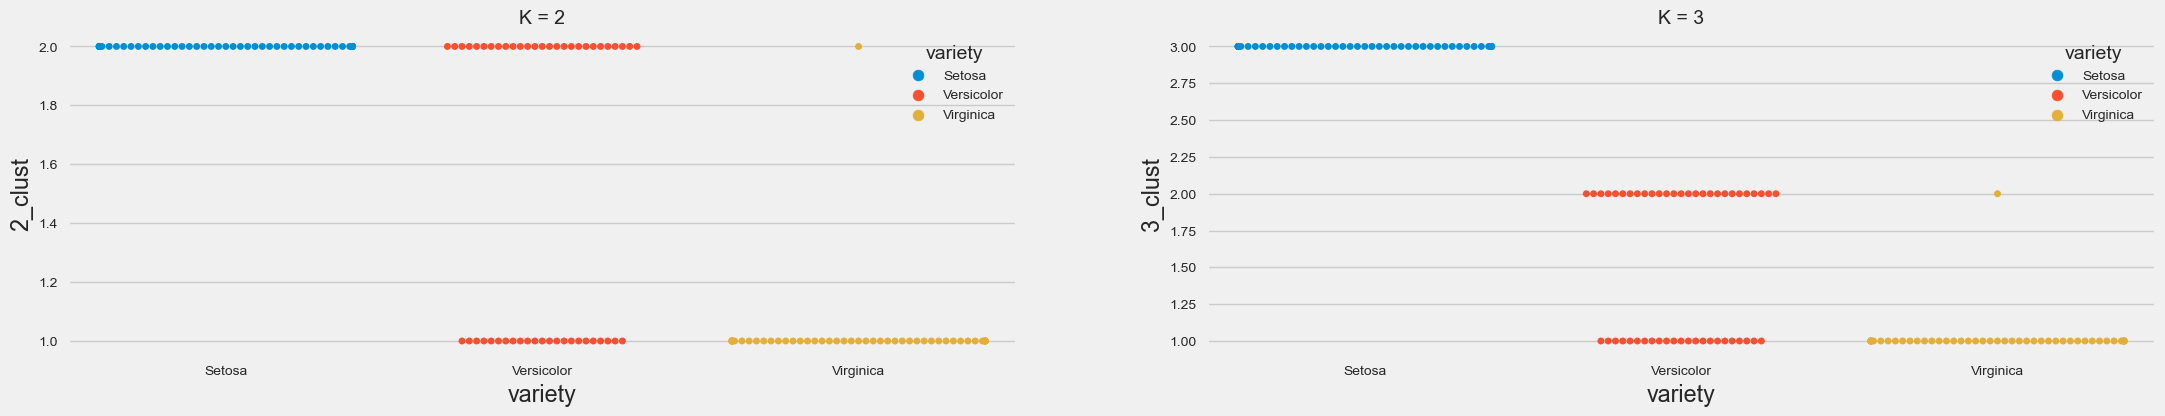

In [47]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="variety",y="2_clust", data=iris_2, hue="variety")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="variety",y="3_clust", data=iris_2, hue="variety")

In [48]:
print(pd.crosstab(iris_2["variety"],iris_2["3_clust"]))

3_clust      1   2   3
variety               
Setosa       0   0  50
Versicolor  23  27   0
Virginica   49   1   0


### Heatmap of feature means

Inference:

The heatmap shows that the clusters separation shows decreasing values for Petal Width and Length, and Sepal Lenght. With flowers in cluster 3 being the smaller ones and flowers in cluster 1 the larger ones.

* Cluster 1: Largest Flowers: This flowers have the largest petals and longer sepals of the dataset.
* Cluster 2: Medium size flowers.
* Cluster 3: Small Flower.

<AxesSubplot:ylabel='3_clust'>

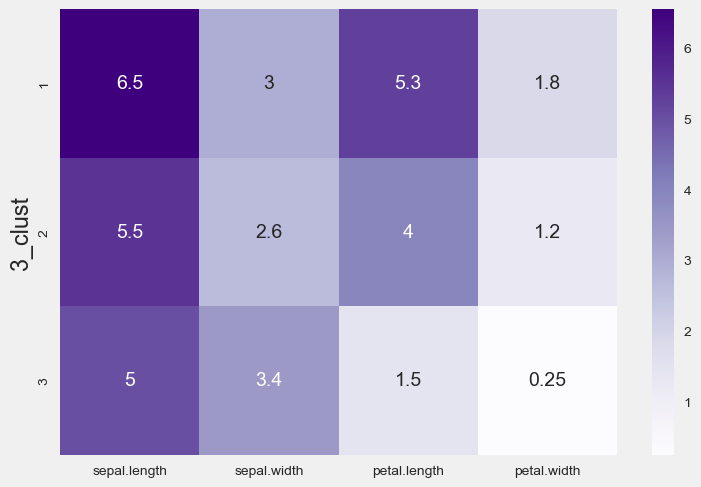

In [49]:
sns.heatmap(iris_2.loc[:,["sepal.length","sepal.width","petal.length","petal.width","3_clust"]].groupby(['3_clust']).mean(), cmap="Purples", annot = True)

## Principal Component Analysis

For a detailed expalanation, please visit the following pages:

* Theory: https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19
* Python implementation: https://365datascience.com/tutorials/python-tutorials/pca-k-means/


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)